# Preliminary Experiments Results
This notebook collects and analyzes results from preliminary experiments on Human Activity Recognition (HAR) datasets. The goal is to evaluate the impact of class imbalance and data distribution on model performance in preliminary tests.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataloading
import os
from sklearn.decomposition import PCA
import torch

In [4]:
df1 = dataloading.load_data1()
df1.head()

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos,activity
0,-9.494311,5.423363,0.196757,-1.684995,0.401508,1.334339,-8.855526,4.199663,-0.335983,-0.762366,-0.750471,1.109060,0.232662,0.672025,0.101603,0.695649,Running
1,-8.890651,2.520043,0.963310,-0.895032,-1.936677,1.436671,-8.399648,5.060810,0.067106,-0.613229,-0.121966,1.906942,0.245168,0.660660,0.131849,0.697164,Running
2,-5.632800,1.581015,0.230293,2.350318,-3.642859,-1.169414,-7.911231,5.790931,0.218930,-0.142383,-0.352063,1.759936,0.264845,0.648175,0.163016,0.695091,Running
3,-6.322698,6.228244,-0.756644,0.812825,-0.722664,-0.334024,-7.523226,6.280006,0.364660,-0.148775,-0.382955,1.208129,0.299550,0.624335,0.195080,0.694564,Running
4,-7.640211,4.862821,1.715490,0.349670,-0.468074,-0.378780,-6.921238,6.909286,0.727059,-1.047857,0.379773,0.828895,0.310003,0.607825,0.220415,0.697039,Running


### Experiment 1,2

Experiment 1:
In this experiment, we trained a naively defined DNN model (i.e n_features * 10 * 10 * n_labels) on each dataset using a 20%/80% train-test split. And the training routine was configured  with n_epochs = 5, n_client = 1
and n_data_split = 1 (which means that we pass the whole data on just 1 client)

dataset1: info => n_subjects = 12, n_samples = 94,198
train_set_accuracy: 0.809, test_set_accuracy: 0.795

dataset2: info => n_subjects = 30, n_samples = 10,299
train_set_accuracy: 0.9, test_set_accuracy: 0.87

dataset3: info => n_subjects = 9, n_samples = 247,208
train_set_accuracy: 0.99, test_set_accuracy: 0.98

dataset4: info => n_subjects = 10, n_samples = 343,195
    train_set_accuracy: 0.86, test_set_accuracy: 0.86
    
dataset5: info => n_subjects = 32, n_samples = 5,988,306
train_set_accuracy: 0.889, test_set_accuracy: 0.889

dataset6: info => n_subjects = 24, n_samples = 1,412,865
train_set_accuracy: 0.765, test_set_accuracy: 0.764
    
We used a 20%/80% train-test split because we sample from N clients and pass it to just one. There is an abundance of training samples for the model to learn from. Some datasets include a subject ID to distinguish which data belongs to which subject. This setup simulates federated data but for now we wiil just concatenate the data into a single dataframe and modify the volume and class imbalance as needed.

At first glance, the data appears to be easy to learn, even for a single training client, using just 20% of the dataset. But since our datasets contain up to 32 subjects (meaning each client receives approximately 3% of the total data), we may need to evaluate the performance of a single client by further subdividing the data.

Experiment 2:
n_clients = 1, n_data_split = up to 35, n_epochs = 5, n_global_iters = 1, train_test_split = 0.8%/0.2%

Note: as of this time. we train test split the data for every client. As a result we have as many test data as the number of clients. This may not be optimal as we do not have a common reference to analyze the results. We will proceede to data analysis with this in our minds and we will change this in the following experiments

Note: In the current data pipeline, we perform a train-test split for each client individually. As a result, the number of test datasets equals the number of clients. This approach may not be optimal, as it lacks a common reference for result analysis. We will take this into consideration during data analysis and make adjustments in future experiments.

dataset1: 
n_data_splits = 9
    n_epochs = 5 => train_set_accuracy: 0.799, test_set_accuracy: 0.786
    n_epochs = 100 => train_set_accuracy: 0.827, test_set_accuracy: 0.792

n_data_splits = 35
    n_epochs = 5 => train_set_accuracy: 0.737, test_set_accuracy: 0.687
    n_epochs = 100 => train_set_accuracy: 0.85, test_set_accuracy: 0.76

dataset2: 
n_data_splits = 30
    n_epochs = 5 => train_set_accuracy: 0.75, test_set_accuracy: 0.838
    n_epochs = 100 => train_set_accuracy: 0.99, test_set_accuracy: 0.926

n_data_splits = 35
    n_epochs = 5 => train_set_accuracy: 0.74, test_set_accuracy: 0.758
    n_epochs = 100 => train_set_accuracy: 1.0, test_set_accuracy: 0.879

dataset3: 
n_data_splits = 35
    n_epochs = 5 => train_set_accuracy: 0.97, test_set_accuracy: 0.95
    n_epochs = 100 => train_set_accuracy: 0.996, test_set_accuracy: 0.985

dataset4:
n_data_splits = 35
    n_epochs = 5 => train_set_accuracy: 0.846, test_set_accuracy: 0.825
    n_epochs = 100 => train_set_accuracy: 0.895, test_set_accuracy: 0.858

dataset5: 
n_data_splits = 35
    n_epochs = 5 => train_set_accuracy: 0.886, test_set_accuracy: 0.888
    n_epochs = 100 => train_set_accuracy: 0.891, test_set_accuracy: 0.891

dataset6: 
n_data_splits = 35
    n_epochs = 5 => train_set_accuracy: 0.76, test_set_accuracy: 0.757
    n_epochs = 100 => train_set_accuracy: 0.77, test_set_accuracy: 0.765

We conducted tests with both 5 and 100 epochs to evaluate the effect of overfitting. Splitting the data among 35 subjects did not result in any deterioration of the results, indicating that the data volume collected for each subject is sufficient for building a reliable classification model.

### Experiment 3

We currently have 2 clients, but we will attempt to simulate 50 clients and observe the results.
To achieve this, we will randomly split Dataset 1 into 50 parts and train the same model in 25 batches
of 2 clients each. This setup may simulate one round of global iteration with 50 clients,
so we do not anticipate significant improvements

Conclusion: 
Overfitting is easy in this problem, so after a few iterations, we achieve a train set accuracy of 1.0. 
After the first pass of all 50 clients, the accuracy improved from 0.744 to 0.815 (~9%).
Whether this improvement is low or high is not our primary concern. What matters is that after 3 batches of
clients, the accuracy increased from 0.744 to 0.809. This suggests that, at least after a single pass of the
initial 50 clients, we did not observe significant benefits from training across multiple clients compared
to local training on individual datasets

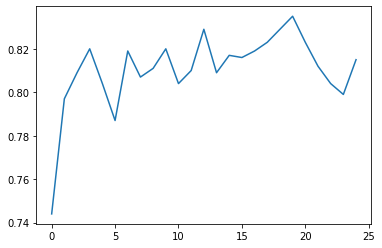

In [11]:
# training routine => (n_data_split) x (client_batch_size) x (n_epochs) x (n_global_iters) => 50 x 2 x 5 x 10
# train_test_split = 0.2, 0.8
# model = [16, 50, 50, 6]
train_set_accuracy = [1] * 25
train_set_accuracy[0] = 0.98

test_set_accuracy = [0.744, 0.797, 0.809, 0.82, 0.804, 0.787, 0.819, 0.807, 0.811, 0.82, 0.804,
                     0.81, 0.829, 0.809, 0.817, 0.816, 0.819, 0.823, 0.829, 0.835, 0.823, 0.812, 0.804,
                     0.799,0.815]

plt.plot(test_set_accuracy)

### Experiment 4

Before applying the class imbalance described one class_ratio_list for every client and every label we first
balance the dataset using downsampling (we have an abaduance of data so we do not care losing some samples) and
then we modify the data imbalansess at will.

Conclusion:
We observed an improvement from 0.8 (the best-case scenario for a single client with 100 epochs) to 0.838 (5% increase) but only with 2 clients. However, after the last 2 iterations, the accuracy started to deteriorate.

In [15]:
# experiment 4: turn up a little bit the class imbalance knob
# training_routine = 6 x 2 x 5 x 10, model = [16, 50, 50, 6]
# train_test_split = 0.2, 0.8

X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df1,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=6)

class_ratio_list = [
    [0.1, 0.1, 0.1, 0.8, 0.1, 0.8], 
    [0.8, 0.1, 0.2, 0.3, 0.8, 0.8], 
    [0.8, 0.8, 0.1, 0.2, 0.3, 0.8], 
    [0.8, 0.8, 0.8, 0.1, 0.2, 0.3], 
    [0.3, 0.8, 0.8, 0.8, 0.1, 0.2], 
    [0.2, 0.3, 0.8, 0.8, 0.8, 0.1]
]

client_data_im = []
for idx,(X_train, y_train, X_test, y_test) in enumerate(client_data):
    class_ratio = class_ratio_list[idx]
    X_train_im, y_train_im, X_test_im, y_test_im = dataloading.class_imbalance((X_train,y_train,X_test,y_test),class_ratio,balance=True)
    dataloading.print_balance(y_train_im,y_test_im)
    client_data_im.append((X_train_im, y_train_im, X_test_im, y_test_im))
    

#training_routine = 6 x 2 x 5 x 10
train_set_accuracy_1 = [0.98, 0.98, 0.97]
test_set_accuracy_1 = [0.838, 0.815, 0.817]

# here are some other training routines for reference
#training_routine = 6 x 1 x 5 x 1
train_set_accuracy_2 = [0.87]
test_set_accuracy_2 = [0.75]

#training_routine = 6 x 1 x 100 x 1
train_set_accuracy_3 = [1.0]
test_set_accuracy_3 = [0.8]

#training_routine = 6 x 1 x 1000 x 1
train_set_accuracy_4 = [0.99]
test_set_accuracy_4 = [0.79]

X_train: (18839, 16), y_train: (18839,), X_test: (75359, 16), y_test: (75359,)
y_train counts: [ 84  84  84 674  84 674] ratio: [0.04988124 0.04988124 0.04988124 0.40023753 0.04988124 0.40023753]
y_test counts: [3369 3369 3369 3369 3369 3369] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [718  90 180 269 718 718] ratio: [0.26661716 0.03341998 0.06683996 0.0998886  0.26661716 0.26661716]
y_test counts: [3350 3350 3350 3350 3350 3350] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [659 659  82 165 247 659] ratio: [0.26669365 0.26669365 0.03318495 0.06677459 0.09995953 0.26669365]
y_test counts: [3401 3401 3401 3401 3401 3401] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [718 718 718  90 180 269] ratio: [0.26661716 0.26661716 0.26661716 0.03341998 0.06683996 0.0998886 ]
y_test counts: [3435 3435 3435 3435 3435 3435] ratio: [0.16666667 0.16666667 0.16666667

### Experiment 5: do the same with a more aggresive class imbalance

There is clearly a reason to use more than 1 client on a heavily imbalanced dataset (although here we also 
turn a lot the volume knob). However, is there a reason to use more than 2 clients? Reminder that we use
simulated clients so need to run 3 times as much the test. Here we only have 1 simulated globel iteration

In [17]:
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df1,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")
# split data to N = 6 clients
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=6)
# we we balance the dataset and then imbalance it as we want
class_ratio_list = [
    [0.01, 0.01, 0.01, 0.08, 0.01, 0.01], 
    [0.01, 0.01, 0.01, 0.01, 0.08, 0.01], 
    [0.01, 0.01, 0.01, 0.01, 0.01, 0.08], 
    [0.08, 0.01, 0.01, 0.01, 0.01, 0.01], 
    [0.01, 0.08, 0.01, 0.01, 0.01, 0.01], 
    [0.01, 0.01, 0.08, 0.01, 0.01, 0.01]
]

client_data_im = []
for idx,(X_train, y_train, X_test, y_test) in enumerate(client_data):
    class_ratio = class_ratio_list[idx]
    X_train_im, y_train_im, X_test_im, y_test_im = dataloading.class_imbalance((X_train,y_train,X_test,y_test),class_ratio,balance=True)
    dataloading.print_balance(y_train_im,y_test_im)
    client_data_im.append((X_train_im, y_train_im, X_test_im, y_test_im))
    
#training_routine = 6 x 2 x 5 x 10
train_set_accuracy_1 = [0.99, 1, 1]
test_set_accuracy_1 = [0.62, 0.618, 0.621]

# here are some other training routines for reference
#training_routine = 6 x 1 x 5 x 1
train_set_accuracy_2 = [0.76]
test_set_accuracy_2 = [0.31]

#training_routine = 6 x 1 x 100 x 1
train_set_accuracy_3 = [1.0]
test_set_accuracy_3 = [0.522]

#training_routine = 6 x 1 x 1000 x 1
train_set_accuracy_4 = [1.0]
test_set_accuracy_4 = [0.5]

X_train: (18839, 16), y_train: (18839,), X_test: (75359, 16), y_test: (75359,)
y_train counts: [ 8  8  8 67  8  8] ratio: [0.07476636 0.07476636 0.07476636 0.62616822 0.07476636 0.07476636]
y_test counts: [3369 3369 3369 3369 3369 3369] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [ 9  9  9  9 72  9] ratio: [0.07692308 0.07692308 0.07692308 0.07692308 0.61538462 0.07692308]
y_test counts: [3350 3350 3350 3350 3350 3350] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [ 8  8  8  8  8 66] ratio: [0.0754717  0.0754717  0.0754717  0.0754717  0.0754717  0.62264151]
y_test counts: [3401 3401 3401 3401 3401 3401] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [72  9  9  9  9  9] ratio: [0.61538462 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]
y_test counts: [3435 3435 3435 3435 3435 3435] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0

### Experiment 6: we will experiment with heavily class imbalanced dataset but one dataset will have all the data

We can clearly observe the impact of the additional data, which caused a rise in the third accuracy measurement.  
There is a clear advantage for clients with limited data resources when participating in an aggregated  
training model, as they benefit indirectly from a more comprehensive dataset.

In [18]:
# training_routine = 6 x 2 x 20 x 10

X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df1,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")
# split data to N = 6 clients
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=6)
# we we balance the dataset and then imbalance it as we want
class_ratio_list = [
    [0.01, 0.01, 0.01, 0.08, 0.01, 0.01], 
    [0.01, 0.01, 0.01, 0.01, 0.08, 0.01], 
    [0.01, 0.01, 0.01, 0.01, 0.01, 0.08], 
    [0.08, 0.01, 0.01, 0.01, 0.01, 0.01], 
    [0.01, 0.08, 0.01, 0.01, 0.01, 0.01], 
    #[0.01, 0.01, 0.08, 0.01, 0.01, 0.01]
    [1, 1, 1, 1, 1, 1]
]

client_data_im = []
for idx,(X_train, y_train, X_test, y_test) in enumerate(client_data):
    class_ratio = class_ratio_list[idx]
    X_train_im, y_train_im, X_test_im, y_test_im = dataloading.class_imbalance((X_train,y_train,X_test,y_test),class_ratio,balance=True)
    dataloading.print_balance(y_train_im,y_test_im)
    client_data_im.append((X_train_im, y_train_im, X_test_im, y_test_im))
    
    
test_set_accuracy = [0.58, 0.57, 0.83]

X_train: (18839, 16), y_train: (18839,), X_test: (75359, 16), y_test: (75359,)
y_train counts: [ 8  8  8 67  8  8] ratio: [0.07476636 0.07476636 0.07476636 0.62616822 0.07476636 0.07476636]
y_test counts: [3369 3369 3369 3369 3369 3369] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [ 9  9  9  9 72  9] ratio: [0.07692308 0.07692308 0.07692308 0.07692308 0.61538462 0.07692308]
y_test counts: [3350 3350 3350 3350 3350 3350] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [ 8  8  8  8  8 66] ratio: [0.0754717  0.0754717  0.0754717  0.0754717  0.0754717  0.62264151]
y_test counts: [3401 3401 3401 3401 3401 3401] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
y_train counts: [72  9  9  9  9  9] ratio: [0.61538462 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]
y_test counts: [3435 3435 3435 3435 3435 3435] ratio: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0

### Experiment 7: perform experiment 4 but with more iterations

We want to run the experiment 4 again but let the model run for more rounds to see the accuracy trend

Conlcusion:
There is an 0.8 accuray somewhere there. This is where we addded a full extra balanced dataset
on a client and we notice that the accuracy rise was imediate. Also, keep in mind that we train the model
in batches of 2 clients, and we have 3 different test sets. This pattern is clearly visible in the results.
We will also plot the accuracy trend by summing pairs of 3 test sets

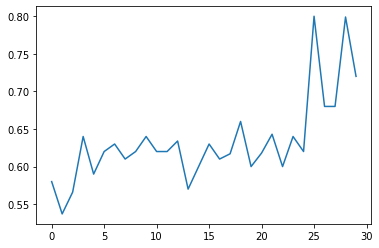

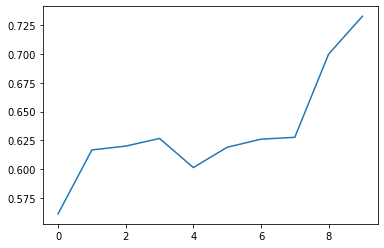

In [30]:
# training_routine = 6 x 2 x 20 x 2
test_set_accuracy = [0.58, 0.537, 0.566, 0.64, 0.59, 0.62, 0.63, 0.61, 0.62, 0.64, 0.62, 0.62
                    ,0.634, 0.57, 0.6, 0.63, 0.61, 0.617, 0.66, 0.6, 0.618, 0.643, 0.6, 0.64
                    ,0.62, 0.8, 0.68, 0.68, 0.799, 0.72]
# note: there is 0.8 accuracy right there. we insert a full extra dataset in this step on the training and
# as we see the accuracy bump is imediate. 


test_set_accuracy_sums_of_three = [sum(test_set_accuracy[i:i+3]) / 3 for i in range(0, len(test_set_accuracy), 3)]

plt.plot(test_set_accuracy)
plt.figure()
plt.plot(test_set_accuracy_sums_of_three)

In [ ]:
# what we need to test. We need to examine the effect of global_iterations of the model and how many operations
# are enough. So we will only test it with 2 clients and we will let it run. Also, on others with cifar-10 dataset
# what was their gains, and after how many global iters and on how many clients. 

We have a major bottleneck here. The numbers of client. on experiment 3 for example. we started from accuracy 0.744 reach 0.815 (an insignificant increase). We have to set the upper and lower limits of accuracy. On what accuracy bump and how many cliens and global iterations are we happy? .But how many clients do we need or how many global iterations till convergence??? However as showcased on experiments 1 and 2 we also we need to find a good reason first to use multiple clients or more than couple clients. When we have some significant class imbalance the benefits of using federated learning are obvious. But how many clients are enough??


Comments: 
1. In Experiment 3 we started with an accuracy of 0.744 and reached 0.815, which is an insignificant increase. But what constitutes an acceptable accuracy bump, and how many clients and global iterations are required to achieve it? Additionally, how many clients or global iterations do we need to reach convergence? (We need to define the upper limits of accuracy: 0.961 (on 80% of dataset n_epochs = 100, same model))

2. However, as demonstrated in Experiments 1 and 2, we must first identify a clear reason for using multiple clients or at least more than couple. When there is a significant class imbalance, the benefits of federated learning are evident. But how many clients are truly necessary?

TODO:
1. We should modify the train test split to have only a single test set
2. There is a bottleneck with the number of client. Do something
3. Experiment on the number of global iterations required for convergence with only 2 clients (since we currently have 2 operational clients). For reference, a paper that uses the CIFAR-10 dataset split across 5 clients conducted tests with approximately 100 global iterations (federated rounds).

# Experiment 8:
We will split 80% of the training data between 2 clients, with each client receiving only half of the labels in their dataset. 
The training will then run for 100 federated rounds to observe the accuracy trend. 
Parameters: n_epochs = 5, model = [10, 50, 50, 6]

In [ ]:
class_ratio_list = [
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0], 
    [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
]

client_data_im = []
for idx,(X_train, y_train, X_test, y_test) in enumerate(client_data):
    class_ratio = class_ratio_list[idx]
    X_train_im, y_train_im, X_test_im, y_test_im = dataloading.class_imbalance((X_train,y_train,X_test,y_test),class_ratio,balance=True)
    dataloading.print_balance(y_train_im,y_test_im)
    client_data_im.append((X_train_im, y_train_im, X_test_im, y_test_im))

dataloading.save_client_data(client_data_im,"dataset_1_experiment_2")

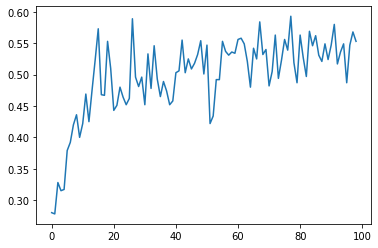

In [46]:
file_path = "/Users/admin/Desktop/dataset_1_experiment_2_results.txt"
with open(file_path, 'r') as file:
    lines = file.readlines()

accuracies = []

for line in lines:
    if "global model accuracy on test set:" in line:
        accuracy = line.split(":")[-1].strip().split("%s")[-1].strip()
        accuracies.append(round(float(accuracy), 3)) 

plt.plot(accuracies)

## experiment 9: same test, less n_epochs, more rounds
We set n_epochs to 1 to avoid overfitting on non i.i.d. data and let FedAvg do its thing. After many rounds (50+), 
we are starting to see the gains. A positive index on why to use Federated Learning on our type of problem

0.6972


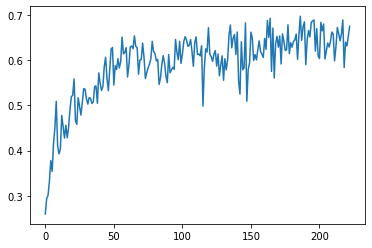

In [56]:
file_path = "/Users/admin/Desktop/experiment10.txt"
with open(file_path, 'r') as file:
    accuracy_list = [round(float(line.strip()), 4) for line in file]

plt.plot(accuracy_list)

print(max(accuracy_list))

### Experiment 10: same as 9 but with bigger model := [10, 100, 100, 6]



0.7891


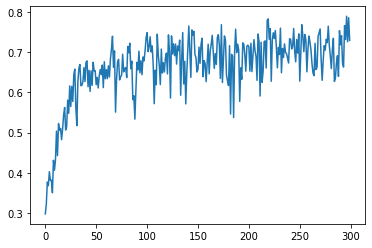

In [4]:
file_path = "/Users/admin/Desktop/experiment11.txt"
with open(file_path, 'r') as file:
    accuracy_list = [round(float(line.strip()), 4) for line in file]

plt.plot(accuracy_list)
print(max(accuracy_list))